<a href="https://colab.research.google.com/github/rahayunr16/Submission-Belajar-Pengembangan-Machine-Learning-1/blob/main/Proyek_Analisis_Sentimen_Rahayu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Proyek Analisis Sentimen Tokopedia Apps dari Playstore**

------

**Sumber Dataset**:  
   Dataset diperoleh dari data hasil scrapping dan merupakan review dari penggunaan Tokopedia.

**Total Rows:** 15.000

**Total Columns:** 5

**Column Names:**
```
    Review ID  : id
    Username   : Pengguna yang komentarin
    Review     : Komentar dari pengguna
    Rating     : Penilaian dari pengguna dari skala 1-5
    Date       : Date ketika pengguna mengunggah review
```


      

##**1. Import Library**


---



In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import requests

!pip install Sastrawi

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from scipy.stats import chi2_contingency
from yellowbrick.cluster import KElbowVisualizer
from wordcloud import WordCloud
from collections import Counter
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from collections import Counter
from tqdm.notebook import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True



---



##**2. Memuat Dataset**


---



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
df ='/content/drive/MyDrive/LASKAR AI/SUBMISSION/Tokopedia_Reviews.csv'
df = pd.read_csv(df)
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,mantap,5,0,3.306.0,2025-05-04 02:58:19,NaN,NaN,3.306.0
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,0,NaN,2025-05-04 02:36:44,NaN,NaN,NaN
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Jelek banget,4,0,NaN,2025-05-04 02:35:48,NaN,NaN,NaN
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,terbaik,5,0,3.309.0,2025-05-04 02:20:26,NaN,NaN,3.309.0
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,KEMANA FITUR TUKAR TAMBAH!!!!,2,0,3.309.0,2025-05-04 01:43:05,"Hi Toppers, terima kasih untuk rating dan ulas...",2025-03-05 00:27:06,3.309.0
...,...,...,...,...,...,...,...,...,...,...,...
14995,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,https://play-lh.googleusercontent.com/a/ACg8oc...,Najis banget nih aplikasi,1,0,NaN,2025-01-03 07:04:56,"Halo Toppers, terima kasih atas rating yang ka...",2025-01-03 07:08:01,NaN
14996,ad4ec101-b784-48a3-a17e-3ee9459e759e,Anjing Anjing,https://play-lh.googleusercontent.com/a/ACg8oc...,bagus,5,0,3.294.1,2025-01-03 06:56:03,"Toppers, terima kasih atas rating yang kamu be...",2025-01-03 07:08:03,3.294.1
14997,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,https://play-lh.googleusercontent.com/a/ACg8oc...,penanganan masalah keluhan konsumen berhari2 ....,1,0,3.294.1,2025-01-03 06:51:10,"Hi Toppers, silakan sampaikan kritik/saran ata...",2025-01-03 07:08:04,3.294.1
14998,2747296a-02c2-4550-8084-05fdda45ba54,Mindo Fals,https://play-lh.googleusercontent.com/a-/ALV-U...,Bagus sekali,5,0,NaN,2025-01-03 06:46:28,"Toppers, terima kasih atas rating yang kamu be...",2025-01-03 06:48:35,NaN




---



##**3. Memahami Struktur Data**


---



1. Tinjau baris dan kolom dari dataset original

In [7]:
df.shape

(15000, 11)



---



2. Hapus beberapa label yang kurang penting untuk analisis ini

In [8]:
df = df.drop(['userImage', 'thumbsUpCount','reviewCreatedVersion','replyContent','repliedAt','appVersion'], axis=1)

In [9]:
df = df.rename(columns={
    'reviewId': 'Review ID',
    'userName': 'Username',
    'content' : 'Review',
    'score'   : 'Rating',
    'at'      : 'Date'
})



---



3. Cek informasi dan datatype

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review ID  15000 non-null  object
 1   Username   15000 non-null  object
 2   Review     14999 non-null  object
 3   Rating     15000 non-null  int64 
 4   Date       15000 non-null  object
dtypes: int64(1), object(4)
memory usage: 586.1+ KB


terdapat keanehan karena date seharusnya bertypee datatime, akan dirubah di pre-processing data

terdapat keanehan karena pada kolom ```review``` terdapat 1 data null



---



4. Baca data kembali

In [11]:
df.head(10)

,Review ID,Username,Review,Rating,Date
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04 02:58:19
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04 02:36:44
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04 02:35:48
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04 02:20:26
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04 01:43:05
5,ae3dd577-1ef7-46be-a2a5-3832e17532c4,Pengguna Google,ok,4,2025-05-04 01:02:34
6,78f43d98-3c21-4fd3-85bc-e038d3bb0bb5,Pengguna Google,Pihak Tokopedia kurang memberikan solusi untuk...,1,2025-05-04 00:20:16
7,e389b6a8-2c8b-48bb-b1a4-7848f13e03e3,Pengguna Google,proses cepat dan tidak banyak kendala,5,2025-05-04 00:16:50
8,66d9f034-6396-4dbb-a685-8d432dd9484f,Pengguna Google,pembayaran Tokopedia lebih cepat dan praktis m...,5,2025-05-04 00:10:44
9,40aa59b1-603d-4d18-b7f3-f869c12ce74d,Pengguna Google,Saat pelayanan tokopedia semakin parah. tidak ...,1,2025-05-03 23:40:59




---



##**4. Data Pre-processing**



---



1. Ubah datatype

In [12]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.normalize()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review ID  15000 non-null  object        
 1   Username   15000 non-null  object        
 2   Review     14999 non-null  object        
 3   Rating     15000 non-null  int64         
 4   Date       15000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 586.1+ KB




---



2. Menghapus atau Menangani Data Kosong (Missing Values)

In [14]:
df = df.dropna(subset=['Review'])



---



3. Menghapus Data Duplikat

In [15]:
df.drop_duplicates(subset="Review", keep='first', inplace=True)

<ipython-input-15-fa88f08dbfa0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset="Review", keep='first', inplace=True)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Review ID  12001 non-null  object        
 1   Username   12001 non-null  object        
 2   Review     12001 non-null  object        
 3   Rating     12001 non-null  int64         
 4   Date       12001 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 562.5+ KB


In [17]:
duplicates = df.duplicated()

print("Baris duplikat:")
print(df[duplicates])

Baris duplikat:
Empty DataFrame
Columns: [Review ID, Username, Review, Rating, Date]
Index: []




---



4. WordCloud Sebelum Pre-processing

<ipython-input-18-3690d9d7a40a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Review']=df['Review'].fillna('')


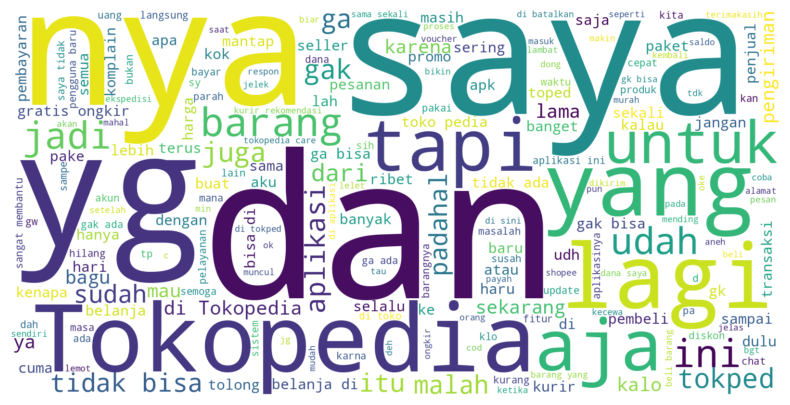

In [18]:
from wordcloud import WordCloud, STOPWORDS

df['Review']=df['Review'].fillna('')

text=' '.join(df['Review'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https','co','RT','...','amp'])

wc=WordCloud(stopwords=stopwords, background_color='white', width=1600, height=800)

wc.generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

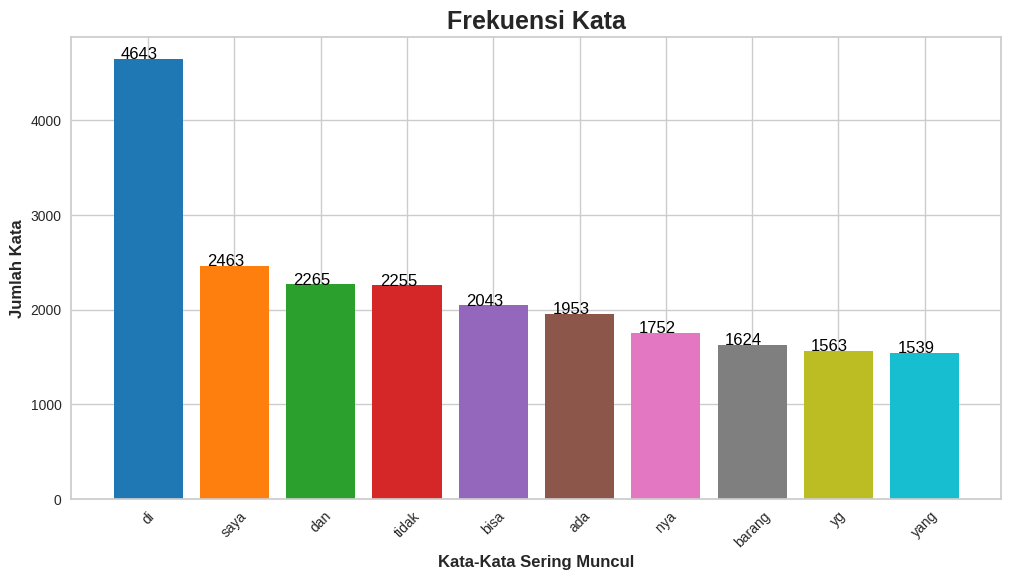

In [19]:
text = " ".join(df["Review"])

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)
word, count = zip(*top_words)
colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()



---



5. Proses Cleaning

In [20]:
def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile(
            "["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            u"\U00002500-\U00002BEF"  # chinese char
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642"
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  # dingbats
            u"\u3030"
            "]+",
            flags=re.UNICODE,
        )
        return emoji_pattern.sub(r"", text)  # Remove emojis
    else:
        return text

def remove_symbols(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'[^a-zA-Z0-9\s]','',text)
    return text

def remove_numbers(text):
    if text is not None and isinstance(text, str):
        text = re.sub(r'\d', '',text)
    return text

def remove_username(text):
    return re.sub(r'@[^\s]+','',text)

df['Cleaning_Review'] = df['Review'].apply(lambda x: remove_username(x))
df['Cleaning_Review'] = df['Cleaning_Review'].apply(lambda x: remove_emoji(x))
df['Cleaning_Review'] = df['Cleaning_Review'].apply(lambda x: remove_symbols(x))
df['Cleaning_Review'] = df['Cleaning_Review'].apply(lambda x: remove_numbers(x))

df.head(20)

,Review ID,Username,Review,Rating,Date,Cleaning_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH
5,ae3dd577-1ef7-46be-a2a5-3832e17532c4,Pengguna Google,ok,4,2025-05-04,ok
6,78f43d98-3c21-4fd3-85bc-e038d3bb0bb5,Pengguna Google,Pihak Tokopedia kurang memberikan solusi untuk...,1,2025-05-04,Pihak Tokopedia kurang memberikan solusi untuk...
7,e389b6a8-2c8b-48bb-b1a4-7848f13e03e3,Pengguna Google,proses cepat dan tidak banyak kendala,5,2025-05-04,proses cepat dan tidak banyak kendala
8,66d9f034-6396-4dbb-a685-8d432dd9484f,Pengguna Google,pembayaran Tokopedia lebih cepat dan praktis m...,5,2025-05-04,pembayaran Tokopedia lebih cepat dan praktis m...
9,40aa59b1-603d-4d18-b7f3-f869c12ce74d,Pengguna Google,Saat pelayanan tokopedia semakin parah. tidak ...,1,2025-05-03,Saat pelayanan tokopedia semakin parah tidak s...




---



6. Case Folding

In [21]:
def case_folding(text):
    if isinstance(text,str):
      lowercase_text=text.lower()
      return lowercase_text
    else:
        return text

df['Case Folding_Review'] = df['Cleaning_Review'].apply(case_folding)
df.head(5)

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah




---



7. Normalisasi Kata

In [22]:
#Muat Kamus Tidak Baku
kamus_data=pd.read_excel('/content/drive/MyDrive/LASKAR AI/SUBMISSION/kamuskatabaku.xlsx')

kamus_data = kamus_data.rename(columns={'tidak_baku': 'Kata_Tidak_Baku', 'kata_baku': 'Kata_Baku'})
kamus_data.head()

,Kata_Tidak_Baku,Kata_Baku
0,woww,wow
1,aminn,amin
2,met,selamat
3,netaas,menetas
4,keberpa,keberapa


In [23]:
def normalisasi_text(text, kamus_data):
    kata_kata = text.split()

    kamus_dict = dict(zip(kamus_data['Kata_Tidak_Baku'], kamus_data['Kata_Baku']))
    kata_kata_normal = [kamus_dict.get(kata, kata) for kata in kata_kata]

    text_normal = ' '.join(kata_kata_normal)

    return text_normal


def normalize_dataframe(df, kamus_data):
    if 'Case Folding_Review' not in df.columns:
        raise ValueError("Kolom Case Folding_Review tidak ditemukan di DataFrame")

    required_cols = ['Kata_Tidak_Baku', 'Kata_Baku']
    if not all(col in kamus_data.columns for col in required_cols):
        raise ValueError(f"Kamus data harus memiliki kolom {required_cols}")

    df['Case Folding_Review'] = df['Case Folding_Review'].astype(str)

    df['Normalisasi_Review'] = df['Case Folding_Review'].apply(lambda x: normalisasi_text(x, kamus_data))

    return df

df = normalize_dataframe(df, kamus_data)
df.head(5)

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah




---



8. Tokenization

In [27]:
def tokenize(text):
  tokens=text.split()
  return tokens

df['Tokenize_Review']=df['Normalisasi_Review'].apply(tokenize)

df.head(10)
df.head(5)

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review,Tokenize_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,[mantap]
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"[akun, tibatiba, ke, hapus, pas, daftar, lagi,..."
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"[jelek, banget]"
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,[terbaik]
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"[kemana, fitur, tukar, tambah]"




---



9. Menghapus Stopwords

In [28]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('indonesian')

def remove_stopwords(text):
    return [word for word in text if word not in stop_words]

df['Stopword Removal_Review'] = df['Tokenize_Review'].apply(lambda x: remove_stopwords(x))

df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review,Tokenize_Review,Stopword Removal_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,[mantap],[mantap]
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"[akun, tibatiba, ke, hapus, pas, daftar, lagi,...","[akun, tibatiba, hapus, pas, daftar]"
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"[jelek, banget]","[jelek, banget]"
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,[terbaik],[terbaik]
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"[kemana, fitur, tukar, tambah]","[kemana, fitur, tukar]"




---



10. Stemming

In [29]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['Stemming_Review'] = df['Stopword Removal_Review'].apply(lambda x: ' '.join(stem_text(x)))
df.head(5)

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review,Tokenize_Review,Stopword Removal_Review,Stemming_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,[mantap],[mantap],mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"[akun, tibatiba, ke, hapus, pas, daftar, lagi,...","[akun, tibatiba, hapus, pas, daftar]",akun tibatiba hapus pas daftar
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"[jelek, banget]","[jelek, banget]",jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,[terbaik],[terbaik],baik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"[kemana, fitur, tukar, tambah]","[kemana, fitur, tukar]",mana fitur tukar




---



11. Menghapus data bernilai kosong (NAN)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Review ID                12001 non-null  object        
 1   Username                 12001 non-null  object        
 2   Review                   12001 non-null  object        
 3   Rating                   12001 non-null  int64         
 4   Date                     12001 non-null  datetime64[ns]
 5   Cleaning_Review          12001 non-null  object        
 6   Case Folding_Review      12001 non-null  object        
 7   Normalisasi_Review       12001 non-null  object        
 8   Tokenize_Review          12001 non-null  object        
 9   Stopword Removal_Review  12001 non-null  object        
 10  Stemming_Review          12001 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [32]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12001 entries, 0 to 14999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Review ID                12001 non-null  object        
 1   Username                 12001 non-null  object        
 2   Review                   12001 non-null  object        
 3   Rating                   12001 non-null  int64         
 4   Date                     12001 non-null  datetime64[ns]
 5   Cleaning_Review          12001 non-null  object        
 6   Case Folding_Review      12001 non-null  object        
 7   Normalisasi_Review       12001 non-null  object        
 8   Tokenize_Review          12001 non-null  object        
 9   Stopword Removal_Review  12001 non-null  object        
 10  Stemming_Review          12001 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [33]:
df.to_csv('Hasil_Preprocessing.csv', index=False)
from google.colab import files
files.download('Hasil_Preprocessing.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>



---



12. WordCloud Setelah Preprocessing

In [34]:
df ='/content/drive/MyDrive/LASKAR AI/SUBMISSION/Hasil_Preprocessing.csv'
df = pd.read_csv(df)
df

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review,Tokenize_Review,Stopword Removal_Review,Stemming_Review
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,['mantap'],['mantap'],mantap
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"['akun', 'tibatiba', 'ke', 'hapus', 'pas', 'da...","['akun', 'tibatiba', 'hapus', 'pas', 'daftar']",akun tibatiba hapus pas daftar
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"['jelek', 'banget']","['jelek', 'banget']",jelek banget
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,['terbaik'],['terbaik'],baik
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"['kemana', 'fitur', 'tukar', 'tambah']","['kemana', 'fitur', 'tukar']",mana fitur tukar
...,...,...,...,...,...,...,...,...,...,...,...
11996,dabc7729-e774-4469-9f73-9e46a0dceb95,Sundari Ndcune,"mantap sob,cuma pengantaran sampai nya agak la...",5,2025-01-03,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai nya agak lambat,mantap sobcuma pengantaran sampai ya agak lambat,"['mantap', 'sobcuma', 'pengantaran', 'sampai',...","['mantap', 'sobcuma', 'pengantaran', 'ya', 'la...",mantap sobcuma antar ya lambat
11997,ff6e138f-48c2-427b-90cb-7c6987d3bbe9,Mariyah Mariyah,aku baru banget menggunakan aplikasi Tokopedia...,5,2025-01-03,aku baru banget menggunakan aplikasi Tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,aku baru banget menggunakan aplikasi tokopedia...,"['aku', 'baru', 'banget', 'menggunakan', 'apli...","['banget', 'aplikasi', 'tokopedia', 'mudahan',...",banget aplikasi tokopedia mudah kecewa langgan
11998,a6921862-8688-48e2-8302-e04a2057e3d4,Mamah Fajar,Najis banget nih aplikasi,1,2025-01-03,Najis banget nih aplikasi,najis banget nih aplikasi,najis banget nih aplikasi,"['najis', 'banget', 'nih', 'aplikasi']","['najis', 'banget', 'nih', 'aplikasi']",najis banget nih aplikasi
11999,5609d48d-e844-4c1a-acde-b76b8e1726ac,Keiko Iko,penanganan masalah keluhan konsumen berhari2 ....,1,2025-01-03,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,penanganan masalah keluhan konsumen berhari it...,"['penanganan', 'masalah', 'keluhan', 'konsumen...","['penanganan', 'keluhan', 'konsumen', 'berhari...",tangan keluh konsumen hari itu selesai inigopa...


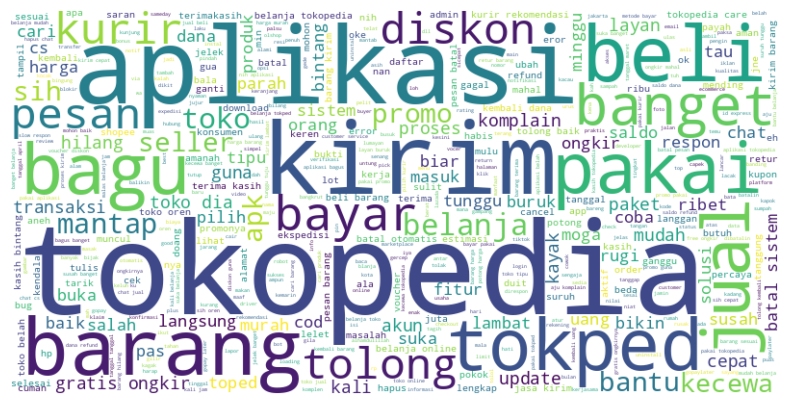

In [36]:
text = ' '.join(df['Stemming_Review'].astype(str).tolist())

stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', '...', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'kak', 'tan'])

wc = WordCloud(stopwords=stopwords, background_color="white", max_words=500, width=800, height=400)

wc.generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

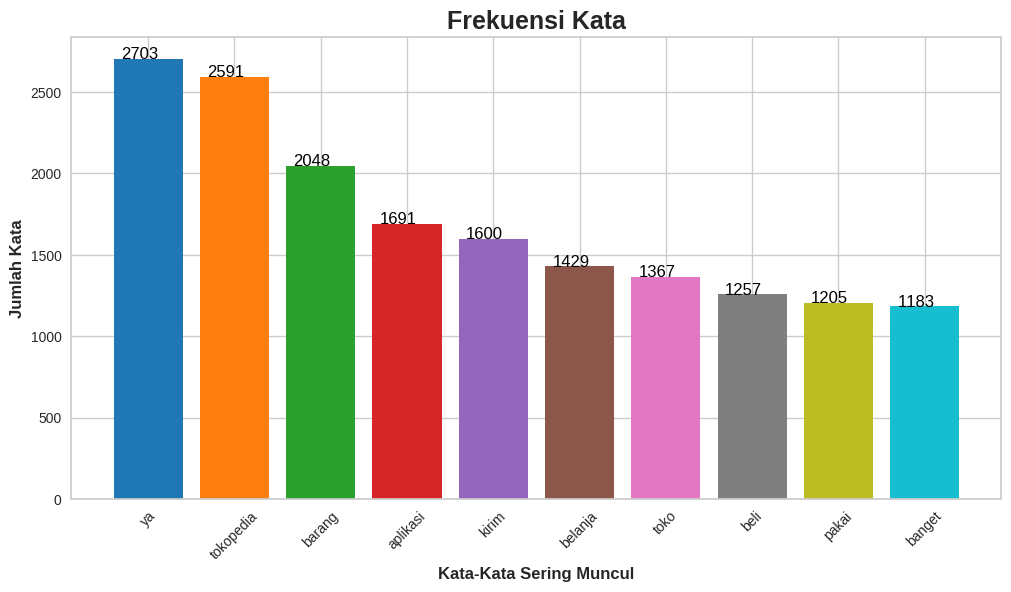

In [39]:
text = " ".join(df['Stemming_Review'].astype(str).fillna(''))

tokens = text.split()
word_counts = Counter(tokens)

top_words = word_counts.most_common(10)

word, count = zip(*top_words)

colors = plt.cm.tab10(range(len(word)))

plt.figure(figsize=(12, 6))
bars = plt.bar(word, count, color=colors)
plt.xlabel("Kata-Kata Sering Muncul", fontsize=12, fontweight='bold')
plt.ylabel("Jumlah Kata", fontsize=12, fontweight='bold')
plt.title("Frekuensi Kata", fontsize=18, fontweight='bold')
plt.xticks(rotation=45)

for bar, num in zip(bars, count):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, num + 1, str(num), fontsize=12, color='black', ha='center')

plt.show()



---



##**5. Labellling Data dengan Lexicon Based**



---



In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review ID                12001 non-null  object
 1   Username                 12001 non-null  object
 2   Review                   12001 non-null  object
 3   Rating                   12001 non-null  int64 
 4   Date                     12001 non-null  object
 5   Cleaning_Review          11954 non-null  object
 6   Case Folding_Review      11954 non-null  object
 7   Normalisasi_Review       11951 non-null  object
 8   Tokenize_Review          12001 non-null  object
 9   Stopword Removal_Review  12001 non-null  object
 10  Stemming_Review          11898 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.0+ MB


In [42]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11898 entries, 0 to 12000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Review ID                11898 non-null  object
 1   Username                 11898 non-null  object
 2   Review                   11898 non-null  object
 3   Rating                   11898 non-null  int64 
 4   Date                     11898 non-null  object
 5   Cleaning_Review          11898 non-null  object
 6   Case Folding_Review      11898 non-null  object
 7   Normalisasi_Review       11898 non-null  object
 8   Tokenize_Review          11898 non-null  object
 9   Stopword Removal_Review  11898 non-null  object
 10  Stemming_Review          11898 non-null  object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [46]:
# Unduh kamus leksikon positif dan negatif dari GitHub
positive_url = "https://raw.githubusercontent.com/fajri91/InSet/master/positive.tsv"
negative_url = "https://raw.githubusercontent.com/fajri91/InSet/master/negative.tsv"

positive_lexicon = set(pd.read_csv(positive_url, sep='\t', header=None)[0])
negative_lexicon = set(pd.read_csv(negative_url, sep='\t', header=None)[0])

# Fungsi untuk menentukan sentimen dan menghitung skornya
def determine_sentiment(text):
    if isinstance(text, str):
        positive_count = sum(1 for word in text.split() if word in positive_lexicon)
        negative_count = sum(1 for word in text.split() if word in negative_lexicon)
        sentiment_score = positive_count - negative_count

        if sentiment_score > 0:
            sentiment = "Positif"
        elif sentiment_score < 0:
            sentiment = "Negatif"
        else:
            sentiment = "Netral"

        return sentiment_score, sentiment
    return 0, "Netral"

# Tentukan sentimen dan skor untuk setiap ulasan
df[['Score', 'Label']] = df['Stemming_Review'].apply(lambda x: pd.Series(determine_sentiment(x)))
df.head(10)

,Review ID,Username,Review,Rating,Date,Cleaning_Review,Case Folding_Review,Normalisasi_Review,Tokenize_Review,Stopword Removal_Review,Stemming_Review,Score,Label
0,2afd23b3-2d79-4cab-8a71-7c6b81ffa9bf,Pengguna Google,mantap,5,2025-05-04,mantap,mantap,mantap,['mantap'],['mantap'],mantap,1,Positif
1,5d5b845c-1408-41e1-b172-2857b55c457c,Pengguna Google,akun tiba-tiba ke apus pas daftar lagi ga bisa,2,2025-05-04,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke apus pas daftar lagi ga bisa,akun tibatiba ke hapus pas daftar lagi tidak bisa,"['akun', 'tibatiba', 'ke', 'hapus', 'pas', 'da...","['akun', 'tibatiba', 'hapus', 'pas', 'daftar']",akun tibatiba hapus pas daftar,0,Netral
2,b4c62d54-5fa7-4e96-8cba-371a952a7bc9,Pengguna Google,Jelek banget,4,2025-05-04,Jelek banget,jelek banget,jelek banget,"['jelek', 'banget']","['jelek', 'banget']",jelek banget,0,Netral
3,546f3d9a-e4d4-4987-a323-c547d8f7e3e4,Pengguna Google,terbaik,5,2025-05-04,terbaik,terbaik,terbaik,['terbaik'],['terbaik'],baik,0,Netral
4,bd35e418-5eed-45e1-91db-eb273fc9ac0b,Pengguna Google,KEMANA FITUR TUKAR TAMBAH!!!!,2,2025-05-04,KEMANA FITUR TUKAR TAMBAH,kemana fitur tukar tambah,kemana fitur tukar tambah,"['kemana', 'fitur', 'tukar', 'tambah']","['kemana', 'fitur', 'tukar']",mana fitur tukar,0,Netral
5,ae3dd577-1ef7-46be-a2a5-3832e17532c4,Pengguna Google,ok,4,2025-05-04,ok,ok,ok,['ok'],['ok'],ok,1,Positif
6,78f43d98-3c21-4fd3-85bc-e038d3bb0bb5,Pengguna Google,Pihak Tokopedia kurang memberikan solusi untuk...,1,2025-05-04,Pihak Tokopedia kurang memberikan solusi untuk...,pihak tokopedia kurang memberikan solusi untuk...,pihak tokopedia kurang memberikan solusi untuk...,"['pihak', 'tokopedia', 'kurang', 'memberikan',...","['tokopedia', 'solusi', 'konsumen', 'memesan',...",tokopedia solusi konsumen mes produk jual dire...,7,Positif
7,e389b6a8-2c8b-48bb-b1a4-7848f13e03e3,Pengguna Google,proses cepat dan tidak banyak kendala,5,2025-05-04,proses cepat dan tidak banyak kendala,proses cepat dan tidak banyak kendala,proses cepat dan tidak banyak kendala,"['proses', 'cepat', 'dan', 'tidak', 'banyak', ...","['proses', 'cepat', 'kendala']",proses cepat kendala,1,Positif
8,66d9f034-6396-4dbb-a685-8d432dd9484f,Pengguna Google,pembayaran Tokopedia lebih cepat dan praktis m...,5,2025-05-04,pembayaran Tokopedia lebih cepat dan praktis m...,pembayaran tokopedia lebih cepat dan praktis m...,pembayaran tokopedia lebih cepat dan praktis m...,"['pembayaran', 'tokopedia', 'lebih', 'cepat', ...","['pembayaran', 'tokopedia', 'cepat', 'praktis'...",bayar tokopedia cepat praktis ovo,1,Positif
9,40aa59b1-603d-4d18-b7f3-f869c12ce74d,Pengguna Google,Saat pelayanan tokopedia semakin parah. tidak ...,1,2025-05-03,Saat pelayanan tokopedia semakin parah tidak s...,saat pelayanan tokopedia semakin parah tidak s...,saat pelayanan tokopedia semakin parah tidak s...,"['saat', 'pelayanan', 'tokopedia', 'semakin', ...","['pelayanan', 'tokopedia', 'parah', 'setia', '...",layan tokopedia parah setia bertahuntahun lang...,0,Netral


<ipython-input-47-5a53dbbce407>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')


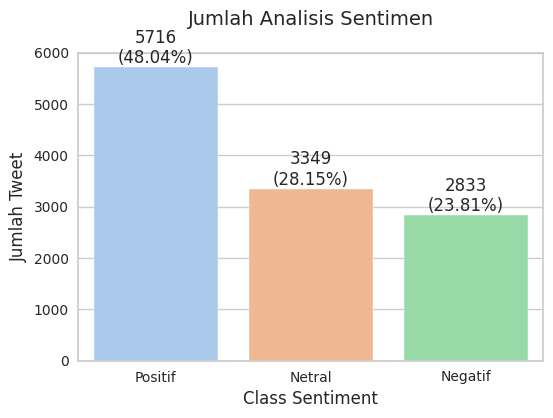

In [47]:
sentiment_count = df['Label'].value_counts()
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette='pastel')
plt.title('Jumlah Analisis Sentimen', fontsize=14, pad=20)
plt.xlabel('Class Sentiment', fontsize=12)
plt.ylabel('Jumlah Tweet', fontsize=12)

total = len(df['Label'])

for i, count in enumerate(sentiment_count.values):
    percentage = f'{100 * count / total:.2f}%'
    ax.text(i, count + 0.10, f'{count}\n({percentage})', ha='center', va='bottom')

plt.show()

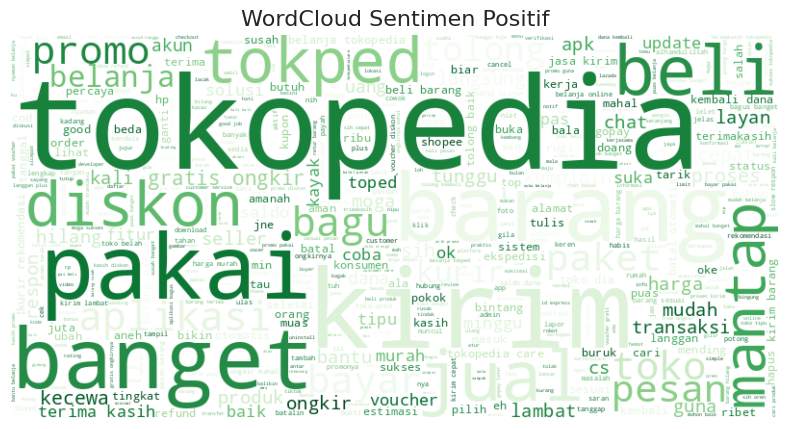

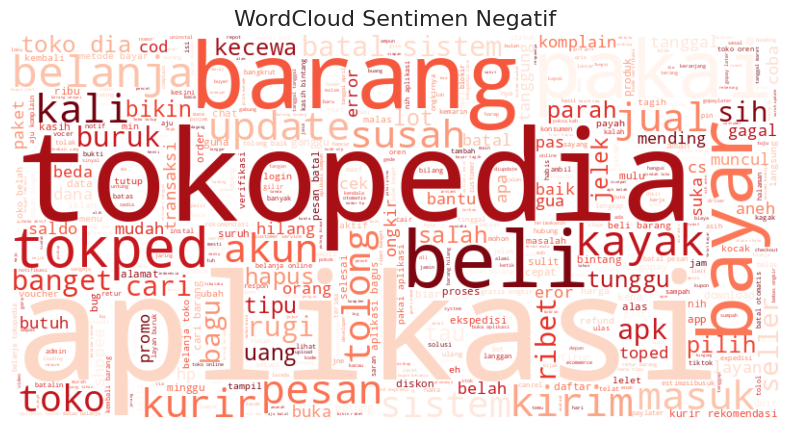

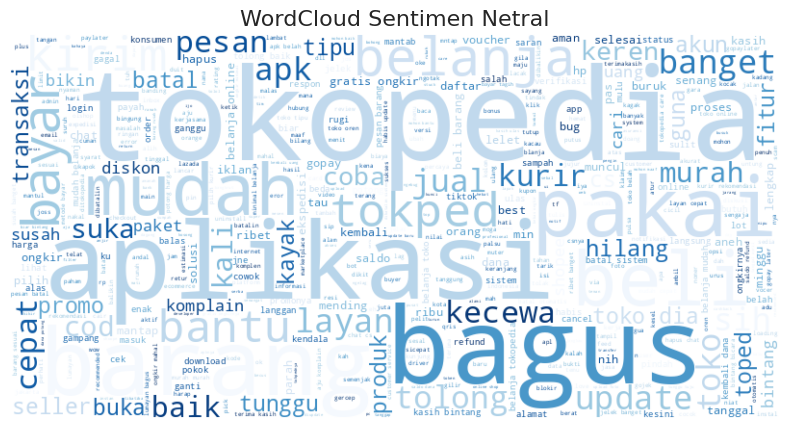

In [50]:
stopwords = set(STOPWORDS)
stopwords.update(['https', 'co', 'RT', 'amp', 'lu', 'deh', 'fyp', 'ya', 'gue', 'kak', 'tan'])

# Fungsi untuk membuat wordcloud dari label tertentu
def buat_wordcloud(df, label_sentimen, warna):
    text = ' '.join(df[df['Label'] == label_sentimen]['Stemming_Review'].astype(str).tolist())
    wc = WordCloud(
        stopwords=stopwords,
        background_color='white',
        max_words=500,
        width=800,
        height=400,
        colormap=warna
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud Sentimen {label_sentimen}', fontsize=16)
    plt.axis('off')
    plt.show()

# Tampilkan wordcloud untuk masing-masing sentimen
buat_wordcloud(df, 'Positif', 'Greens')
buat_wordcloud(df, 'Negatif', 'Reds')
buat_wordcloud(df, 'Netral', 'Blues')




---



##**6. Membangun Model**

In [51]:
label_count = df["Label"].value_counts()
print(label_count)

Label
Positif    5716
Netral     3349
Negatif    2833
Name: count, dtype: int64


In [52]:
df_list = df["Stemming_Review"].tolist()
print(df_list)

['mantap', 'akun tibatiba hapus pas daftar', 'jelek banget', 'baik', 'mana fitur tukar', 'ok', 'tokopedia solusi konsumen mes produk jual direspon jual mes produk paket someday direspon jual toko aktif aju batal mesan direspon jual chat kali kali direspon aju batal mesan tunggu batal otomatis jual merespon', 'proses cepat kendala', 'bayar tokopedia cepat praktis ovo', 'layan tokopedia parah setia bertahuntahun langgan investigasi kirim becus pindah faltform', 'tolong developer serta nomor kurir foto barang barang hilang kurir ya hubungin hubung kurir nomor', 'terima kasih jaga account langgan retas', 'bayar mudah cepat', 'bayar pajak samsat jatim nik sesuai coba motor sesuai', 'mantuuuuul abizzzzz', 'bagus mantap', 'mohon maaf tidk mngnstl apk nih kode otp hp apk nih urus dngn apk nih salah data mhn bantu tanggung segan lapor wajib terimakasih', 'merespon komplen saldo rekening dana ambil tokopedia transaksi apa', 'bisa bayar invoicenya', 'ok bantu mudah praktis', 'belanjan seru tipu',



---



##**7. Feature Extraction TF-IDF**

In [54]:
df['Stemming_Review'] = df['Stemming_Review'].fillna('')

# Konversi kolom menjadi list
df_list = df['Stemming_Review'].tolist()

# Proses TF-IDF vektorisasi
df_tfidf = TfidfVectorizer()
X = df_tfidf.fit_transform(df_list)

print('Feature Extraction Selesai!!!')
print('===== Bentuk Transformasi Feature Extraction =====')
print(X.shape)

# Mendapatkan nama fitur (term)
feature_names = df_tfidf.get_feature_names_out()

# Menghitung total skor TF-IDF untuk setiap term
tfidf_sums = X.sum(axis=0)
tfidf_df = pd.DataFrame({
    'term': feature_names,
    'tfidf_sum': tfidf_sums.tolist()[0]
})
tfidf_df = tfidf_df.sort_values('tfidf_sum', ascending=False)

print("\n====== Top 20 Terms by Total TF-IDF Score ======")
print(tfidf_df.head(20))

# Menampilkan nilai IDF untuk setiap term
print("\n====== IDF Values ======")
idf_values = df_tfidf.idf_
idf_df = pd.DataFrame({'Term': feature_names, 'IDF': idf_values})
print(idf_df.head(20))

# Menampilkan nilai TF-IDF untuk 5 dokumen pertama
print("\n====== TF-IDF values for the first 5 documents ======")
for i in range(min(5, len(df_list))):
    first_document_tfidf = pd.DataFrame(
        X[i].T.todense(),
        index=feature_names,
        columns=["TF-IDF"]
    )
    print(f"\nDocument {i+1} TF-IDF Values:")
    print(first_document_tfidf.sort_values("TF-IDF", ascending=False).head(10))


Feature Extraction Selesai!!!
===== Bentuk Transformasi Feature Extraction =====
(11898, 10378)

====== Top 20 Terms by Total TF-IDF Score ======
            term   tfidf_sum
10291         ya  396.266987
9547   tokopedia  395.735286
627        bagus  355.138874
459     aplikasi  323.633926
964      belanja  301.257144
817       barang  295.979245
4431       kirim  259.038816
5914       mudah  252.289060
743       banget  250.482590
5374      mantap  242.320754
9519        toko  221.185412
6712       pakai  208.402432
980         beli  194.115386
907        bayar  189.052890
2301      diskon  188.975122
7424       promo  182.362661
1612       cepat  172.384685
791        bantu  172.087207
6548      ongkir  169.604613
7155       pesan  165.908151

====== IDF Values ======
        Term       IDF
0       aaaa  9.691062
1      aaaaa  9.691062
2     aanehh  9.691062
3     aangat  9.691062
4       aaya  9.691062
5        aba  9.691062
6       abad  9.285597
7       abai  8.081625
8       abal



---



##**8. Melakukan Split dan Train Evaluate**

Classifier: Naive Bayes
Accuracy: 0.6235294117647059
Classification Report:
              precision    recall  f1-score   support

     Negatif       0.89      0.37      0.52       562
      Netral       0.72      0.20      0.31       662
     Positif       0.58      0.99      0.73      1156

    accuracy                           0.62      2380
   macro avg       0.73      0.52      0.52      2380
weighted avg       0.69      0.62      0.57      2380

Confusion Matrix:
[[ 207   43  312]
 [  23  131  508]
 [   3    7 1146]]


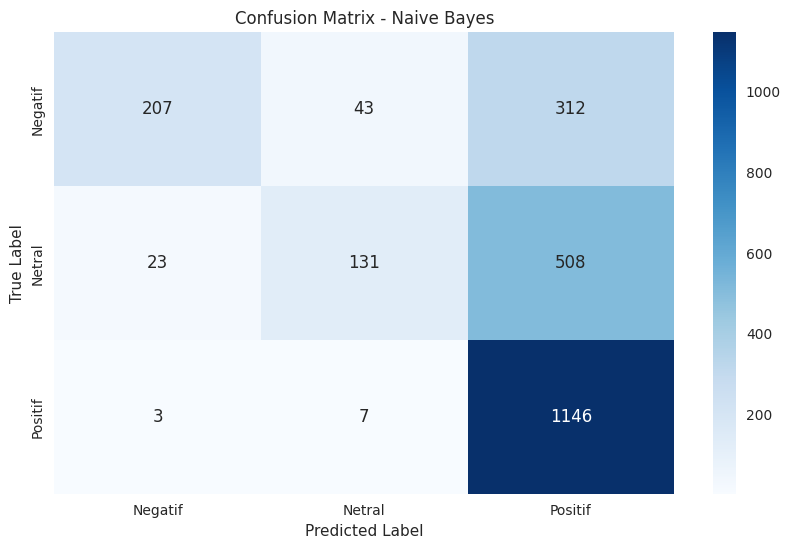

In [68]:
y = df['Label']
# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': MultinomialNB()
}

results = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'accuracy' : accuracy,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }

print(f"Classifier: {name}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.title(f'Confusion Matrix - {name}')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

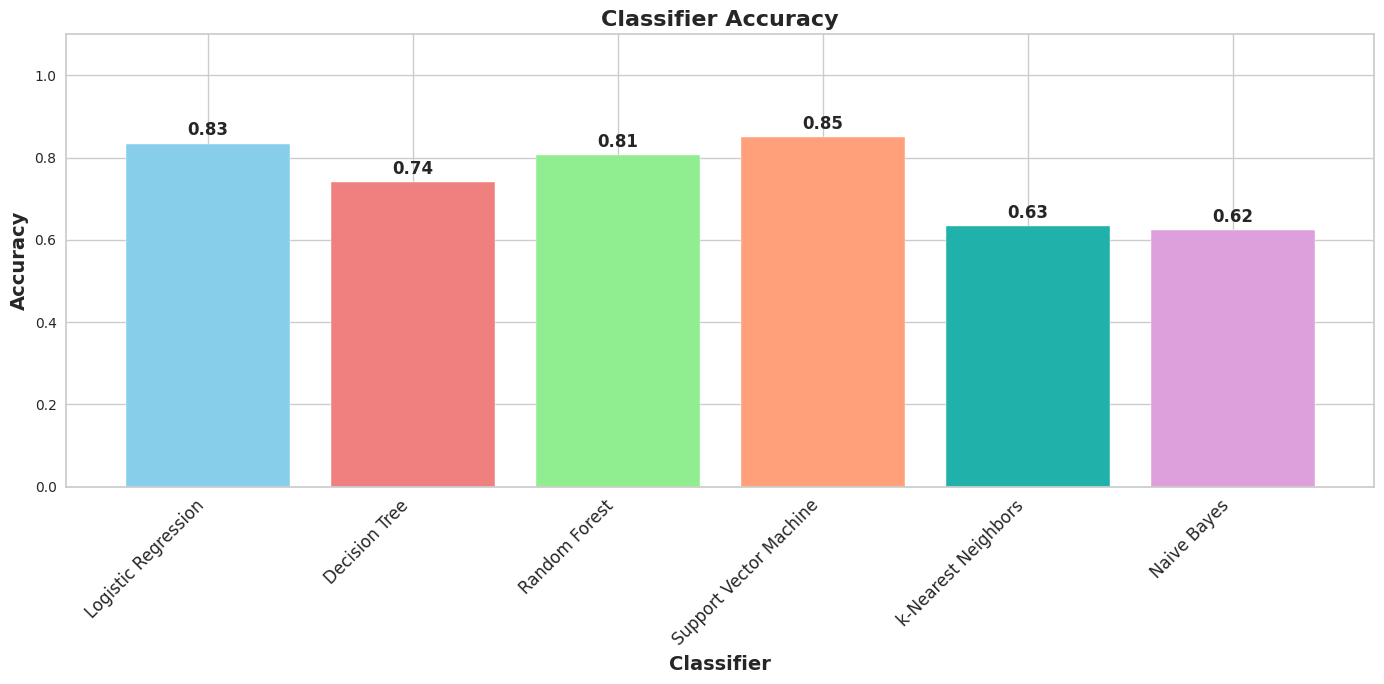

In [70]:
classifiers = list(results.keys())
accuracy_before = [results[name]['accuracy'] for name in classifiers]

plt.figure(figsize=(14, 7))
bars = plt.bar(classifiers, accuracy_before, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightseagreen', 'plum'])  # Different colors
plt.xlabel("Classifier", fontsize=14, fontweight='bold')
plt.ylabel("Accuracy", fontsize=14, fontweight='bold')
plt.title("Classifier Accuracy", fontsize=16, fontweight='bold')
plt.ylim(0, 1.1)
plt.xticks(rotation=45, ha="right", fontsize=12)

for bar, acc in zip(bars, accuracy_before):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{acc:.2f}", ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()



---



#**Kesimpulan**

Diperoleh hasil untuk akurasi dengan SVM sebesar 85%